<a href="https://colab.research.google.com/github/Swethasamy12/Neural-Network-Regression-Model/blob/main/exp1_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df1=pd.read_csv("/content/nn-dl-exp.csv")
X = df1[['input']].values
y = df1[['output']].values

In [ ]:
import pandas as pd

# Create sample data for input and output
sample_data = {
    'input': [10.0, 20.0, 30.0, 40.0, 50.0],
    'output': [20.0, 40.0, 60.0, 80.0, 100.0]
}

# Create a DataFrame
df_sample = pd.DataFrame(sample_data)

# Save the DataFrame to a CSV file in the /content/ directory
df_sample.to_csv('/content/nn-dl-exp.csv', index=False)

print("Sample 'nn-dl-exp.csv' created successfully in /content/")

Sample 'nn-dl-exp.csv' created successfully in /content/


In [ ]:
df1=pd.read_csv("/content/nn-dl-exp.csv")
X = df1[['input']].values
y = df1[['output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,10)
    self.fc2=nn.Linear(10,18)
    self.fc3=nn.Linear(18,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
ai_brain=NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [ ]:
def train_model(ai_brain,X_train,y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss=criterion(ai_brain(X_train),y_train)
    loss.backward()
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch%200==0:
      print(f'Epoch [{epoch}/{epochs}], Loss:{loss.item():.6f}')

In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss:5556.337402
Epoch [200/2000], Loss:3590.643799
Epoch [400/2000], Loss:1121.072388
Epoch [600/2000], Loss:91.258301
Epoch [800/2000], Loss:34.351810
Epoch [1000/2000], Loss:10.257558
Epoch [1200/2000], Loss:1.014365
Epoch [1400/2000], Loss:0.003259
Epoch [1600/2000], Loss:0.000000
Epoch [1800/2000], Loss:0.004239


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.011020


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

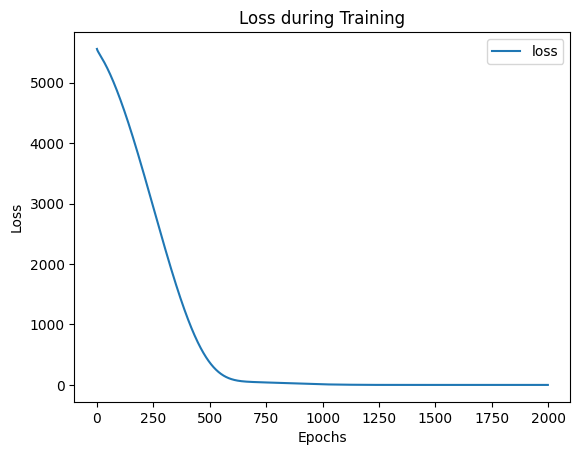

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[3]], dtype=torch.float32)
prediction1 = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction1: {prediction1}')

Prediction1: 13.593411445617676


In [ ]:
X_n1_1 = torch.tensor([[5]], dtype=torch.float32)
prediction2 = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction2: {prediction2}')

Prediction2: 14.950176239013672


Now that the `nn-dl-exp.csv` file has been created, you can try running the cell that loads the data again.